# BREAST CANCER CLASSIFICATION

## Author : Balu Niranjan

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Dataset Loading

In [2]:
data = pd.DataFrame(load_breast_cancer()['data'], 
columns=load_breast_cancer()['feature_names']) 
data['y'] = load_breast_cancer()['target'] 

In [3]:
#dataset without target variable
df = data.drop(["y"], axis=1).copy()

In [4]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Feature Engineering

In [5]:
data["y"].value_counts()

y
1    357
0    212
Name: count, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:
data.isnull().sum().any()

False

### Data Scaling

In [9]:
scaler = StandardScaler()

column_to_exclude = 'y'
columns_to_scale = [col for col in data.columns if col != column_to_exclude]
scaler.fit(data[columns_to_scale])
data_scaled = scaler.transform(data[columns_to_scale])
data[columns_to_scale] = data_scaled

In [10]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0


## Visualization

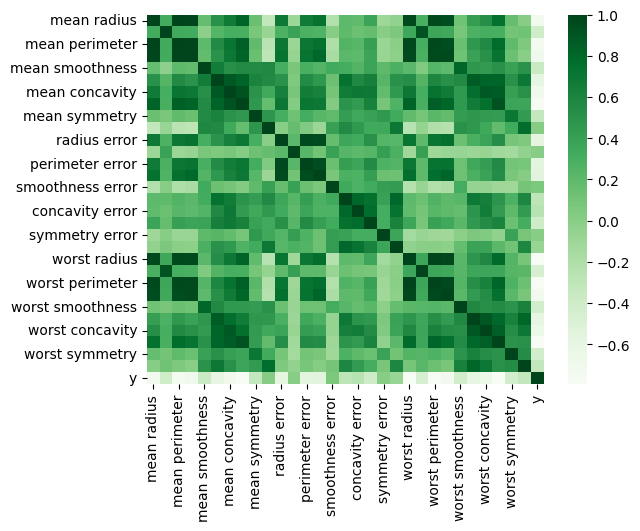

In [11]:
sns.heatmap(data.corr(), cmap='Greens')
plt.show()

In [12]:
corr = data.corr()["y"]
best_features_corr = []

for i in range(len(corr)-1):
    if abs(corr.values[i]) > 0.7 :
        best_features_corr.append(corr.index[i])

In [13]:
print(f"Correlated features of more than (0.7) : {best_features_corr}")
print(f"Number of correlated features of more than (0.7) :{len(best_features_corr)}")

Correlated features of more than (0.7) : ['mean radius', 'mean perimeter', 'mean area', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points']
Number of correlated features of more than (0.7) :8


## Modelling

In [14]:
y = data["y"].copy()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=12)

### Decision Tree Classifier

In [16]:
param_grid = {"criterion": ["gini", "entropy"], 
              "max_depth": [10, 20, 50, 100], 
              "min_samples_leaf" : [10, 20, 50]}

dtc = DecisionTreeClassifier()
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_estimator)


Best Parameters: DecisionTreeClassifier(max_depth=10, min_samples_leaf=20)


In [17]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10)

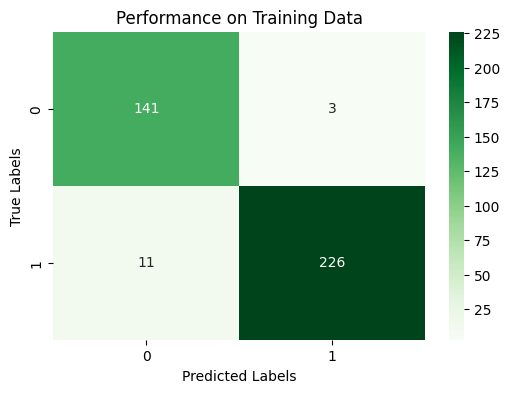

In [18]:
y_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Performance on Training Data')
plt.show()

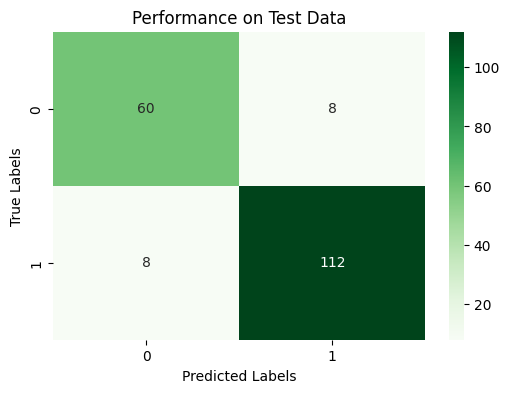

In [19]:
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Performance on Test Data')
plt.show()

In [20]:
print('Performance of Training Data:',train_score)
print('Performance of Test Data:',test_score)

Performance of Training Data: 0.963254593175853
Performance of Test Data: 0.9148936170212766


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        68
           1       0.93      0.93      0.93       120

    accuracy                           0.91       188
   macro avg       0.91      0.91      0.91       188
weighted avg       0.91      0.91      0.91       188



### Random Forest Classifier

In [22]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

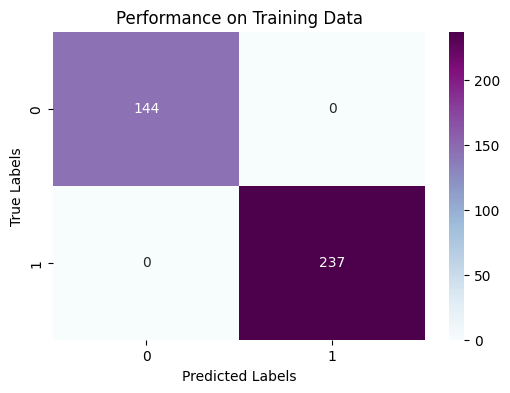

In [23]:
y_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='BuPu', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Performance on Training Data')
plt.show()

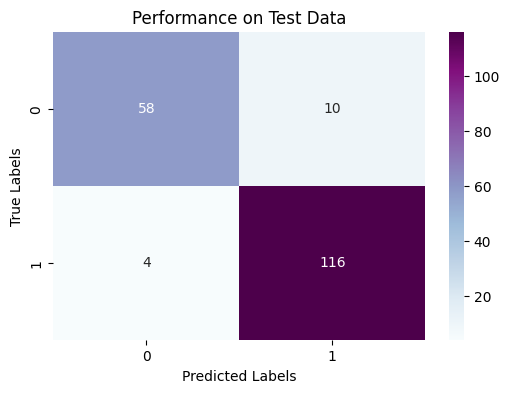

In [24]:
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='BuPu', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Performance on Test Data')
plt.show()

In [25]:
print('Performance of Training Data:',train_score)
print('Performance of Test Data:',test_score)

Performance of Training Data: 1.0
Performance of Test Data: 0.925531914893617


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        68
           1       0.92      0.97      0.94       120

    accuracy                           0.93       188
   macro avg       0.93      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188



### Gradient Boosting Technique

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

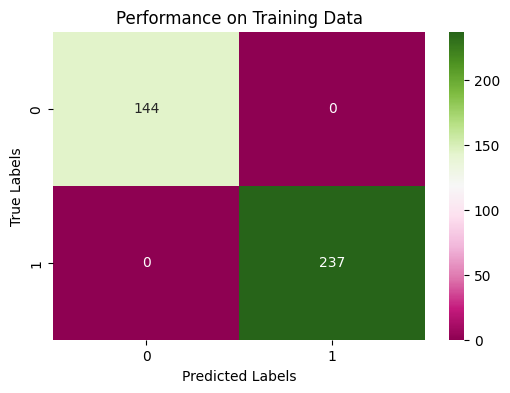

In [28]:
y_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='PiYG', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Performance on Training Data')
plt.show()

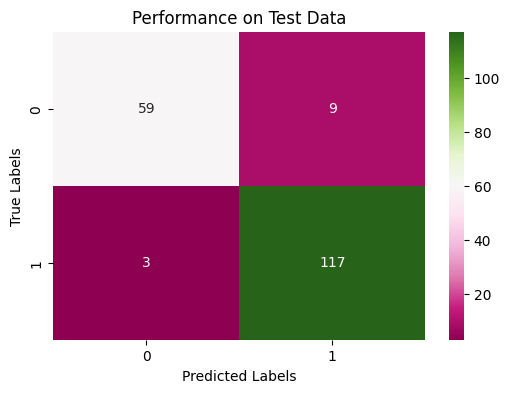

In [29]:
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='PiYG', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Performance on Test Data')
plt.show()

In [30]:
print('Performance of Training Data:',train_score)
print('Performance of Test Data:',test_score)

Performance of Training Data: 1.0
Performance of Test Data: 0.9361702127659575


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        68
           1       0.93      0.97      0.95       120

    accuracy                           0.94       188
   macro avg       0.94      0.92      0.93       188
weighted avg       0.94      0.94      0.94       188



### K Nearest Neighbours Classifier

In [32]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

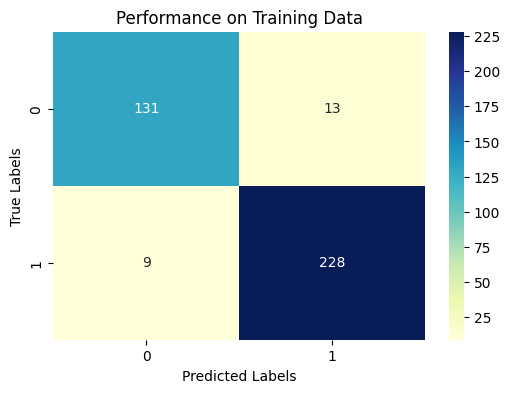

In [33]:
y_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Performance on Training Data')
plt.show()

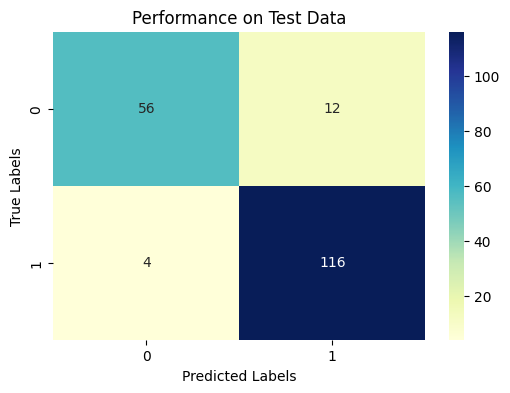

In [34]:
y_pred = model.predict(X_test)
test_score = model.score(X_test, y_test)

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Performance on Test Data')
plt.show()

In [35]:
print('Performance of Training Data:',train_score)
print('Performance of Test Data:',test_score)

Performance of Training Data: 0.9422572178477691
Performance of Test Data: 0.9148936170212766


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        68
           1       0.91      0.97      0.94       120

    accuracy                           0.91       188
   macro avg       0.92      0.90      0.91       188
weighted avg       0.92      0.91      0.91       188



## Performance Evaluation

|Model|Train Data|Test Data|
|--|--|--|
|Decision Tree Classifier|96%|92%|
|Random Forest Classifier|100%|93%|
|Gradient Boosting Technique|100%|94%|
|K Nearest Neighbours|94%|92%|